In [15]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import numpy as np
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [16]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


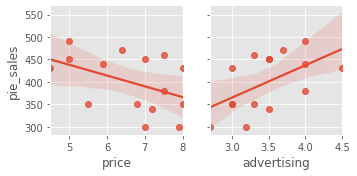

In [17]:
X = df_pie[['price','advertising']]
Y = df_pie['pie_sales']
g=sns.PairGrid(df_pie, y_vars=['pie_sales'],x_vars=['price','advertising'] )
g.map(sns.regplot)


**Penjelasan Grafik:**

Terlihat bahwa grafik pie_sales terhadap price mempunyai korelasi yang negatif, dimana ketika price semakin naik maka pie_sales akan semakin turun, Sedangkan untuk pie_sales terhadap advertising, korelasinya bernilai positif, karena ketika nilai advertising naik maka pie_sales juga naik.

In [18]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


In [19]:
# prediction with sklearn
new_price = 5.50
new_advertising = 3.5
print ('Predicted  pie sales: \n', regr.predict([[new_price,new_advertising]]))

Predicted  pie sales: 
 [428.62155215]


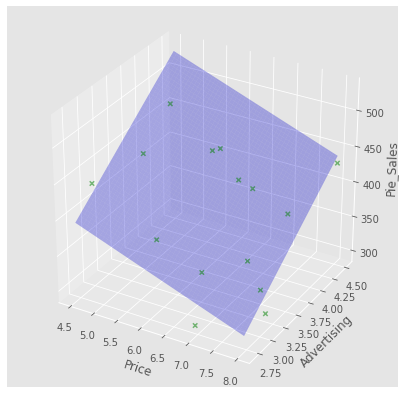

In [24]:
x_surf, y_surf = np.meshgrid(np.linspace(df_pie.price.min(), df_pie.price.max(), 100),np.linspace(df_pie.advertising.min(), df_pie.advertising.max(), 100))
onlyX = pd.DataFrame({'price': x_surf.ravel(), 'advertising': y_surf.ravel()})
fittedY=regr.predict(onlyX)
fittedY=np.array(fittedY)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pie['price'],df_pie['advertising'],df_pie['pie_sales'],c='green', marker='x', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b',  alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('Advertising')
ax.set_zlabel('Pie_Sales')
plt.show()


**Penjelasan Grafik:**

Dapat dilihat di grafik hubungan antara price, advertising, dan pie sales. dimana saat price semakin kecil, dan advertising semakin besar, maka pie sales akan meningkat

In [22]:
X = sm.add_constant(X) # adding a constant

In [23]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        10:36:33   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

# **Penjelasan:**

**Uji Model/ koefisien determinasi:**

Pada tabel hasil regresi ditunjukkan bahwa untuk Adj. R-squared bernilai 0.442. Jadi, sebanyak 44.2% untuk pie_sales dipengaruhi oleh price dan advertising, sisanya 55.8% dapat dipengaruhi oleh sebab lain.

**Penentuan Model Regresi:**

Berdasarkan hasil perhitungan didapat nilai Intercept 306.526193,coefficient untuk price -24.975090 dan coefficient untukadvertising 74.130957. Dapat dikatakan bahwa model regresi untuk kasus ini adalah: Sales = 306.526 - 24.975 (price) + 74.131 (advertising)

**Uji T:**

df = n-2 = 15-2 = 13 Tingkat kepercayaan dibagi 2 karena two tail = 0.025 Didapat T-tabel = 2.16037/ -2.16037 Sedangkan T-test untuk masing2 variabel adalah: Price = -2.306 Advertising = 2.855 Jadi, kedua variabel dapat dikatakan memiliki pengaruh terhadap pie_sales


**Uji F atau ANOVA:**

F tabel = (k; n-k) > (2; 13) = 3.81 k: jumlah variabel x n: jumlah sampel Dikarenakan F hitung (6.539) > F tabel (3.81), artinya model dapat diterima

**Tes Autokorelasi Positif:**

Dengan n = 15 dan k = 2, maka dL = 0.9455 dan dU = 1.5432. Karena nilai Durbin-Watson bernilai 1.683, maka dalam kasus tersebut tidak terdapat autokorelasi

**P value:**

Nilai p untuk masing-masing variabel adalah sebagai berikut: price = 0.040 advertising = 0.014 Dikarenakan nilai p < level confidence, maka price dan advertising berpengaruh terhadap pie_sales.

**Confidence Interval:**

Dari tabel didapat bahwa untuk batas bawah dan atas dari tiap variabel price dan advertising adalah: -48.576 dan -1.374, 17.553 dan 130.709. Jadi dengan level confidence 95%, rata-rata pengaruh kepada pie_sales untuk price diantara -48.6 USD dan -1.4 USD sedangkan untuk advertising adalah 1755.3 USD dan 13070.9 USD (advertising dalam $100)

